Making of grayscale image array

In [1]:
from PIL import Image
import os

# Function to read all bitmap images from a folder, convert them to grayscale, and store them in an array
def read_bitmap_images(folder_path):
    grayscale_images = []

    # Loop through all files in the folder
    for filename in os.listdir(r"D:\GNR_MP1\MP1\venv\ds203proj\loldataset"):

        # Check if the file is a bitmap image (JPEG format)
        if filename.endswith('.jpg') or filename.endswith('.jpeg'):
            # Construct the full file path
            file_path = os.path.join(folder_path, filename)
           
            # Open the image file using PIL
            image = Image.open(file_path)
            
            # Convert the image to grayscale
            grayscale_image = image.convert('L')
            # Append the grayscale image data to the array
            grayscale_images.append(grayscale_image)
    
    return grayscale_images

In [2]:
# Folder containing the bitmap images
folder_path = r'D:\GNR_MP1\MP1\venv\ds203proj\loldataset'

# Call the function to read bitmap images, convert them to grayscale, and store them in an array
grayscale_images_array = read_bitmap_images(folder_path)
print(len(grayscale_images_array))
print(grayscale_images_array[0])

1183
<PIL.Image.Image image mode=L size=640x480 at 0x1FF18F02390>


display of all images in gray scale

Plotting boundry image 2

tight box fitting

C:\Users\prana\AppData\Local\Temp\ipykernel_16852\388187749.py:28: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


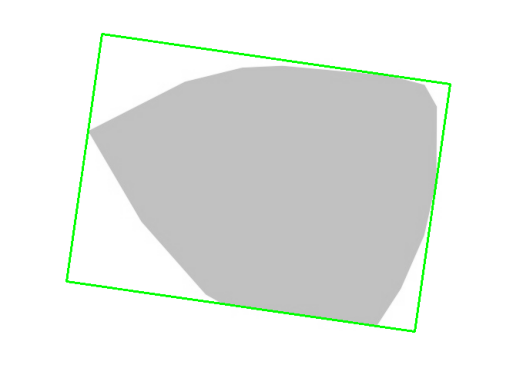

In [3]:
import cv2
import numpy as np

def extract_tight_fitting_box(image):
    # Convert the image to a numpy array
    image_np = np.array(image)
    
    # Convert to grayscale if not already
    if len(image_np.shape) > 2:
        image_gray = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image_np
    
    # Apply Canny edge detection
    edges = cv2.Canny(image_gray, 30, 100)
    
    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Extract tight-fitting bounding box from the largest contour
    bounding_boxes = []
    if len(contours) > 0:
        largest_contour = max(contours, key=cv2.contourArea)
        # Get the minimum area bounding rectangle
        min_rect = cv2.minAreaRect(largest_contour)
        # Convert rectangle parameters to integers
        box = cv2.boxPoints(min_rect)
        box = np.int0(box)
        bounding_boxes.append(box)
    
    return bounding_boxes

# Example: List of grayscale images
gray_images_list = grayscale_images_array  # Replace gray_image1, gray_image2, etc. with your grayscale images

# Extract tight-fitting bounding boxes of each image
bounding_boxes_list = [extract_tight_fitting_box(image) for image in gray_images_list]

import matplotlib.pyplot as plt

def draw_bounding_box(image, bounding_box):
    # Convert the grayscale image to RGB
    image_rgb = cv2.cvtColor(np.array(image), cv2.COLOR_GRAY2RGB)
    
    # Draw the bounding box on the image
    cv2.drawContours(image_rgb, [bounding_box], 0, (0, 255, 0), 2)
    
    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Choose an index to visualize a bounding box
index = 0  # Change this index as needed

# Get the grayscale image and its corresponding bounding box
gray_image = grayscale_images_array[8]
bounding_box = bounding_boxes_list[8][0]  # Extracting the first bounding box

# Draw the bounding box on the image
draw_bounding_box(gray_image, bounding_box)

fuction to determine legth and width 

In [4]:
import numpy as np

def calculate_length_width(bounding_box):
    # Calculate pairwise distances between the vertices
    distances = [np.linalg.norm(bounding_box[i] - bounding_box[j]) for i in range(4) for j in range(i+1, 4)]
    
    # Length is the maximum distance among the first two distances
    length = max(distances[:2])
    
    # Width is the maximum distance among the last two distances
    width = max(distances[2:])
    
    return length, width

# Example usage:
# Assuming you have a bounding box defined as a list of vertices, e.g., bounding_box = [[x1, y1], [x2, y2], [x3, y3], [x4, y4]]
# Replace this with the bounding box you want to calculate length and width for.

bounding_box = bounding_boxes_list[0][0]  # Example bounding box
length, width = calculate_length_width(bounding_box)
print("Length:", length)
print("Width:", width)

Length: 563.6239881339332
Width: 562.6410934156871


Storing the values of legth and bredth in an array

In [5]:
lengths = []
widths = []

# Iterate through the bounding boxes to calculate length and width for each
for bounding_box in bounding_boxes_list:
    # Calculate length and width for the current bounding box
    length, width = calculate_length_width(bounding_box[0])  # Assuming only one bounding box per image
    # Append the length and width to their respective lists
    lengths.append(length)
    widths.append(width)

# Print the lengths and widths lists
print("Lengths:", lengths)
print("Widths:", widths)

Lengths: [563.6239881339332, 564.0079786669688, 557.3984212392425, 561.2717701791174, 566.2552428013361, 556.3892522326433, 563.8022703040491, 565.685424949238, 559.9464260087746, 553.8781454435623, 565.201733896845, 561.8514038426887, 543.9430117208971, 563.4128149057315, 563.932620088606, 563.6000354861593, 562.8818703777907, 566.2552428013361, 560.8029957123981, 565.201733896845, 559.3710754052269, 563.2051136131489, 565.201733896845, 548.2928049865327, 541.5902510200863, 568.8233469188831, 563.2051136131489, 558.082431187365, 565.201733896845, 565.201733896845, 558.7888688941468, 565.201733896845, 561.6422348791087, 565.0362820208982, 564.4005669734927, 565.87277722117, 565.201733896845, 563.0008880987667, 565.201733896845, 563.1074497820109, 557.4262283029029, 546.1547399776001, 563.0008880987667, 559.504244845381, 564.2783001321245, 571.7097165520278, 562.8187985488757, 519.4246817393259, 566.2552428013361, 565.201733896845, 564.2171567756515, 533.5325669535084, 558.2015764936534

area calculation

In [6]:
import cv2
import os
import numpy as np

# Function to find the area of the yellow region in an image
def find_yellow_area(image):
    # Define lower and upper bounds for yellow color in HSV
    lower_yellow = np.array([10, 100, 100])  # Adjusted lower bounds for light shades of yellow
    upper_yellow = np.array([40, 255, 255])  # Adjusted upper bounds
    
    # Convert the image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Create a mask for the yellow region using the defined bounds
    yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
    
    # Find contours in the yellow mask
    contours, _ = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate the area of the yellow region
    yellow_area = 0
    for contour in contours:
        yellow_area += cv2.contourArea(contour)
    
    return yellow_area

# Function to read images from a folder, calculate yellow area, and store in an array
def calculate_yellow_areas(folder_path):
    yellow_areas = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Read the image
            image = cv2.imread(os.path.join(folder_path, filename))
            # Calculate the area of the yellow region
            area = find_yellow_area(image)
            # Append the area to the list
            yellow_areas.append(area)
    return yellow_areas

# Example usage:
folder_path = r"D:\GNR_MP1\MP1\venv\ds203proj\loldataset"
yellow_areas = calculate_yellow_areas(folder_path)

# Print the areas
for i, area in enumerate(yellow_areas):
    print(f"Area of yellow region in image {i+1}: {area}")


Area of yellow region in image 1: 133699.0
Area of yellow region in image 2: 129866.0
Area of yellow region in image 3: 106792.0
Area of yellow region in image 4: 100132.5
Area of yellow region in image 5: 145825.5
Area of yellow region in image 6: 130919.0
Area of yellow region in image 7: 135665.5
Area of yellow region in image 8: 104357.0
Area of yellow region in image 9: 111956.5
Area of yellow region in image 10: 127301.5
Area of yellow region in image 11: 139469.5
Area of yellow region in image 12: 134551.5
Area of yellow region in image 13: 124503.5
Area of yellow region in image 14: 136252.5
Area of yellow region in image 15: 88780.0
Area of yellow region in image 16: 114498.0
Area of yellow region in image 17: 107927.0
Area of yellow region in image 18: 145825.5
Area of yellow region in image 19: 118904.5
Area of yellow region in image 20: 122817.5
Area of yellow region in image 21: 108330.0
Area of yellow region in image 22: 75938.0
Area of yellow region in image 23: 135774.0

compactness, solidity, huMoments, roundness of images

In [7]:
import cv2
import numpy as np
def calculate_parameters(image_path):
 # Load the image
 image = cv2.imread(image_path)

 #Convert to grayscale
 gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

 #Threshold to isolate yellow color in the grayscale image
 _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

 # Find contours
 contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
 largest_contour = max(contours, key=cv2.contourArea)

 # Calculate area and perimeter
 area = cv2.contourArea(largest_contour)
 perimeter = cv2.arcLength(largest_contour, True)

 # Compactness (Shape Factor)
 compactness = perimeter**2 / (4 * np.pi * area)

 # Solidity
 hull = cv2.convexHull(largest_contour)
 hull_area = cv2.contourArea(hull)
 solidity = float(area) / hull_area

 # Hu Moments
 moments = cv2.moments(largest_contour)
 huMoments = cv2.HuMoments(moments)

 # Roundness
 roundness = 4 * area / (np.pi * perimeter**2)

 return compactness, solidity, huMoments, roundness

storing compactness, solidity, huMoments, roundness in list or array

In [8]:
# Directory containing image files
image_dir = r'D:\GNR_MP1\MP1\venv\ds203proj\loldataset'

# Lists to store parameters for each image
compactness_list = []
solidity_list = []
huMoments_list = []
roundness_list = []

# Loop through each image file in the directory
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        image_path = os.path.join(image_dir, filename)
        compactness, solidity, huMoments, roundness = calculate_parameters(image_path)
        # Append parameters to the respective lists
        compactness_list.append(compactness)
        solidity_list.append(solidity)
        huMoments_list.append(huMoments)
        roundness_list.append(roundness)

# Convert Hu Moments list to numpy array
huMoments_array = np.array(huMoments_list)

# You can now access the parameters using these lists or arrays

visualising the counters

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r'D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0001.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold to isolate yellow color in the grayscale image
_, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# Draw the largest contour on the original image
contour_image = cv2.drawContours(image.copy(), [largest_contour], -1, (0, 255, 0), 3)

# Display the image with the largest contour
cv2.imshow('Largest Contour', contour_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


function for detecting corners

In [9]:
import cv2

def count_corners(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Find corners using Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.03, minDistance=5)
    
    # Return the number of corners
    if corners is not None:
        return len(corners)
    else:
        return 0

# Example usage:
# Assuming you have an image stored in the variable 'image'
image = cv2.imread(r'D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0001.jpg')  # Replace 'example_image.jpg' with the path to your image file
num_corners = count_corners(image)
print("Number of corners:", num_corners)

Number of corners: 6


Storing the corner count in an array

In [10]:
import cv2

def count_corners(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Check if the image was successfully loaded
    if image is None:
        return 0
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find corners using Shi-Tomasi corner detection with adjusted parameters
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.03, minDistance=5)
    
    # Return the number of corners
    if corners is not None:
        return len(corners)
    else:
        return 0


# List to store the number of corners for each image
corner_counts = []
# List to store the image paths and their corresponding corner counts
image_paths_with_corner_counts = []
# Iterate over the image file numbers from 1 to 1083
for i in range(1, 1184):
    # Construct the image file path
    image_path = rf'D:\GNR_MP1\MP1\venv\ds203proj\loldataset\{i:04d}.jpg'  # Format the number with leading zeros
    
    # Get the number of corners for the current image
    num_corners = count_corners(image_path)
    
    # Append the number of corners to the list
    if num_corners is not 0 :
     corner_counts.append(num_corners)

    image_paths_with_corner_counts.append((image_path, num_corners)) 

# Print the array containing the number of corners for each image
print("Corner counts:", corner_counts)



<>:37: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
<>:37: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
C:\Users\prana\AppData\Local\Temp\ipykernel_16852\3097408526.py:37: SyntaxWarning: "is not" with 'int' literal. Did you mean "!="?
  if num_corners is not 0 :


Corner counts: [6, 4, 12, 10, 4, 8, 7, 9, 6, 6, 6, 5, 8, 4, 11, 8, 6, 4, 5, 12, 7, 3, 7, 8, 8, 5, 3, 10, 6, 4, 10, 4, 4, 7, 5, 8, 4, 4, 4, 5, 6, 6, 4, 9, 5, 21, 9, 6, 4, 4, 5, 6, 6, 6, 7, 5, 4, 4, 4, 7, 8, 4, 21, 21, 12, 7, 7, 5, 6, 6, 4, 4, 12, 6, 4, 7, 7, 7, 8, 7, 4, 6, 9, 6, 4, 7, 16, 8, 4, 4, 3, 3, 6, 6, 4, 7, 4, 5, 9, 4, 7, 7, 4, 12, 4, 4, 8, 7, 6, 8, 8, 9, 6, 4, 8, 7, 5, 7, 4, 5, 8, 4, 4, 7, 6, 4, 7, 8, 7, 5, 12, 6, 12, 6, 5, 12, 12, 5, 8, 4, 10, 6, 8, 10, 6, 4, 21, 5, 7, 6, 5, 4, 4, 5, 4, 4, 12, 8, 6, 12, 4, 4, 6, 6, 6, 7, 12, 8, 3, 7, 5, 8, 6, 6, 4, 12, 4, 5, 8, 8, 6, 5, 6, 8, 6, 6, 8, 5, 8, 6, 4, 7, 5, 7, 6, 7, 5, 4, 12, 7, 7, 4, 9, 10, 8, 4, 12, 4, 7, 4, 4, 6, 7, 9, 6, 5, 12, 6, 21, 4, 6, 5, 7, 11, 4, 8, 4, 7, 7, 21, 6, 4, 4, 9, 9, 4, 4, 5, 8, 7, 5, 5, 12, 4, 8, 5, 7, 6, 4, 8, 17, 4, 9, 4, 6, 4, 12, 3, 6, 4, 6, 5, 7, 9, 4, 5, 6, 12, 8, 12, 6, 12, 6, 4, 4, 7, 4, 7, 6, 7, 6, 9, 8, 16, 9, 4, 4, 5, 6, 6, 9, 6, 9, 12, 7, 12, 6, 5, 4, 6, 5, 6, 6, 4, 8, 8, 6, 12, 5, 5, 10, 5, 8, 8, 

In [11]:
for image_path, corner_count in image_paths_with_corner_counts:
    if corner_count == 12:
        print("Image link:", image_path)
        

Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0003.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0020.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0065.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0073.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0104.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0131.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0133.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0136.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0137.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0157.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0160.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0167.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0176.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0199.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0207.jpg
Image link: D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0217.jpg
Image li

In [12]:
print(len(corner_counts))

1183


Visualizing corener 

C:\Users\prana\AppData\Local\Temp\ipykernel_16852\83781715.py:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


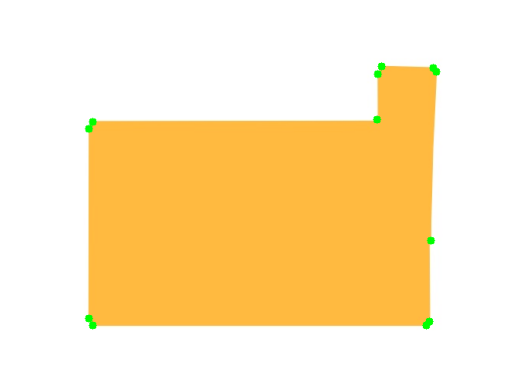

In [13]:
import cv2
import matplotlib.pyplot as plt

def visualize_corners(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find corners using Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.03, minDistance=5)
    
    # Draw circles around the detected corners
    if corners is not None:
        corners = np.int0(corners)
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)  # Green circle with radius 5
    
    # Display the image with detected corners
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage:
image_path = r'D:\GNR_MP1\MP1\venv\ds203proj\loldataset\0020.jpg'  # Replace 'example_image.jpg' with the path to your image file
visualize_corners(image_path)

Making CSV file for co - ordinate points

In [14]:
import cv2
import numpy as np
import os
import csv

def detect_corners(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Find corners using Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.05, minDistance=5)
    
    # Return the coordinates of the detected corners
    if corners is not None:
        corners = np.int0(corners)
        corner_coordinates = []
        for corner in corners:
            x, y = corner.ravel()
            corner_coordinates.append((x, y))
        return corner_coordinates
    else:
        return []

# Base directory containing the images
base_dir = r'D:\GNR_MP1\MP1\venv\ds203proj\loldataset'

# Create a CSV file to write the corner coordinates
csv_file_path = 'corner_coordinates.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    # Define column names
    fieldnames = ['Image No.'] + [f'Corner{i}' for i in range(1, 101)]  # Assuming maximum 100 corners
    
    # Create a CSV writer object
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    # Write the header
    writer.writeheader()
    
    # Iterate over the image file numbers from 1 to 1083
    for i in range(1, 1084):
        # Construct the image file path
        image_path = os.path.join(base_dir, f'{i:04d}.jpg')  # Format the number with leading zeros
        
        # Check if the file exists
        if os.path.exists(image_path):
            # Detect corners in the current image
            corner_coordinates = detect_corners(image_path)
            
            # Prepare the row data
            row_data = {'Image No.': i}
            for j, corner in enumerate(corner_coordinates):
                row_data[f'Corner{j+1}'] = f'{corner[0]},{corner[1]}' if corner else ''
            
            # Write the row to the CSV file
            writer.writerow(row_data)

print("Corner coordinates saved to:", csv_file_path)


C:\Users\prana\AppData\Local\Temp\ipykernel_16852\659682687.py:18: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


Corner coordinates saved to: corner_coordinates.csv


distance matrix for corners

reading and removing empty columns in corner co ordinate csv

In [15]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('corner_coordinates.csv')
df.head()

,Image No.,Corner1,Corner2,Corner3,Corner4,Corner5,Corner6,Corner7,Corner8,Corner9,...,Corner91,Corner92,Corner93,Corner94,Corner95,Corner96,Corner97,Corner98,Corner99,Corner100
0,1,"102,75","546,74","553,400","275,326","105,325","282,409",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"553,91","155,410","103,92","502,410",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"420,332","553,126","434,100","411,346","436,108","413,334","542,336","102,186","205,410",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,"553,172","548,75","103,409","156,90","451,213","508,162","533,161",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"102,74","547,84","103,405","553,383",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Get empty columns
empty_columns = df.columns[df.isnull().all()].tolist()

# Print the empty columns
print("Empty columns:", empty_columns)


Empty columns: ['Corner21', 'Corner22', 'Corner23', 'Corner24', 'Corner25', 'Corner26', 'Corner27', 'Corner28', 'Corner29', 'Corner30', 'Corner31', 'Corner32', 'Corner33', 'Corner34', 'Corner35', 'Corner36', 'Corner37', 'Corner38', 'Corner39', 'Corner40', 'Corner41', 'Corner42', 'Corner43', 'Corner44', 'Corner45', 'Corner46', 'Corner47', 'Corner48', 'Corner49', 'Corner50', 'Corner51', 'Corner52', 'Corner53', 'Corner54', 'Corner55', 'Corner56', 'Corner57', 'Corner58', 'Corner59', 'Corner60', 'Corner61', 'Corner62', 'Corner63', 'Corner64', 'Corner65', 'Corner66', 'Corner67', 'Corner68', 'Corner69', 'Corner70', 'Corner71', 'Corner72', 'Corner73', 'Corner74', 'Corner75', 'Corner76', 'Corner77', 'Corner78', 'Corner79', 'Corner80', 'Corner81', 'Corner82', 'Corner83', 'Corner84', 'Corner85', 'Corner86', 'Corner87', 'Corner88', 'Corner89', 'Corner90', 'Corner91', 'Corner92', 'Corner93', 'Corner94', 'Corner95', 'Corner96', 'Corner97', 'Corner98', 'Corner99', 'Corner100']


In [17]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('corner_coordinates.csv')

# Drop completely empty columns
df_cleaned = df.dropna(axis=1, how='all')

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(df_cleaned)

Cleaned DataFrame:
      Image No.  Corner1  Corner2  Corner3  Corner4  Corner5  Corner6  \
0             1   102,75   546,74  553,400  275,326  105,325  282,409   
1             2   553,91  155,410   103,92  502,410      NaN      NaN   
2             3  420,332  553,126  434,100  411,346  436,108  413,334   
3             4  553,172   548,75  103,409   156,90  451,213  508,162   
4             5   102,74   547,84  103,405  553,383      NaN      NaN   
...         ...      ...      ...      ...      ...      ...      ...   
1078       1079  102,410  552,409   552,76   210,74  106,214      NaN   
1079       1080   102,74   553,85  106,409  552,335  357,410      NaN   
1080       1081  102,410  553,399   549,74   102,87      NaN      NaN   
1081       1082  103,409   102,74  553,236      NaN      NaN      NaN   
1082       1083  534,409   102,92   553,90  120,234      NaN      NaN   

      Corner7  Corner8  Corner9  ... Corner11 Corner12 Corner13 Corner14  \
0         NaN      NaN      

In [18]:
df_cleaned.iloc[1][2]

C:\Users\prana\AppData\Local\Temp\ipykernel_16852\4014756096.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_cleaned.iloc[1][2]


'155,410'

In [19]:
import pandas as pd

# Read the CSV file into a DataFrame
#df = pd.read_csv('corner_coordinates.csv')

# Calculate the percentage of NaN values in each column
nan_percentage = (df_cleaned.isna().mean() * 100).round(2)

# Print the percentage of NaN values in each column
print("Percentage of NaN values in each column:")
print(nan_percentage)


Percentage of NaN values in each column:
Image No.     0.00
Corner1       0.00
Corner2       0.00
Corner3       0.00
Corner4       2.22
Corner5      33.98
Corner6      47.92
Corner7      65.74
Corner8      76.36
Corner9      83.66
Corner10     89.10
Corner11     92.24
Corner12     93.07
Corner13     96.40
Corner14     96.86
Corner15     96.95
Corner16     96.95
Corner17     98.52
Corner18     98.52
Corner19     98.52
Corner20     98.52
dtype: float64


model building

In [22]:
from sklearn.cluster import KMeans
import numpy as np


# Combine the features into a single feature matrix
feature_matrix = np.column_stack((lengths ,widths, corner_counts))

# Apply K-means clustering
num_clusters = 15 # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(feature_matrix)

# Get the cluster labels for each image
cluster_labels = kmeans.labels_

# Print the cluster labels
for i, label in enumerate(cluster_labels):
    print(f"Image {i+1} belongs to Cluster {label+1}")

Image 1 belongs to Cluster 1
Image 2 belongs to Cluster 8
Image 3 belongs to Cluster 3
Image 4 belongs to Cluster 12
Image 5 belongs to Cluster 8
Image 6 belongs to Cluster 9
Image 7 belongs to Cluster 12
Image 8 belongs to Cluster 5
Image 9 belongs to Cluster 14
Image 10 belongs to Cluster 9
Image 11 belongs to Cluster 5
Image 12 belongs to Cluster 14
Image 13 belongs to Cluster 2
Image 14 belongs to Cluster 1
Image 15 belongs to Cluster 13
Image 16 belongs to Cluster 12
Image 17 belongs to Cluster 1
Image 18 belongs to Cluster 8
Image 19 belongs to Cluster 14
Image 20 belongs to Cluster 13
Image 21 belongs to Cluster 14
Image 22 belongs to Cluster 1
Image 23 belongs to Cluster 5
Image 24 belongs to Cluster 7
Image 25 belongs to Cluster 2
Image 26 belongs to Cluster 10
Image 27 belongs to Cluster 1
Image 28 belongs to Cluster 3
Image 29 belongs to Cluster 5
Image 30 belongs to Cluster 8
Image 31 belongs to Cluster 3
Image 32 belongs to Cluster 8
Image 33 belongs to Cluster 14
Image 34

printing the cluster

In [23]:
# Define the number of images to print per cluster
images_per_cluster = 20

# Dictionary to store images for each cluster
cluster_images = {cluster: [] for cluster in range(num_clusters)}

# Collect images for each cluster
for i, label in enumerate(cluster_labels):
    if len(cluster_images[label]) < images_per_cluster:
        cluster_images[label].append(i)  # Store the index of the image

# Display the collected images for each cluster
for cluster, image_indices in cluster_images.items():
    print(f"Cluster {cluster+1}:")
    for i, idx in enumerate(image_indices):
        print(f"Image {idx+1} belongs to Cluster {cluster+1}")

Cluster 1:
Image 1 belongs to Cluster 1
Image 14 belongs to Cluster 1
Image 17 belongs to Cluster 1
Image 22 belongs to Cluster 1
Image 27 belongs to Cluster 1
Image 38 belongs to Cluster 1
Image 40 belongs to Cluster 1
Image 43 belongs to Cluster 1
Image 59 belongs to Cluster 1
Image 68 belongs to Cluster 1
Image 75 belongs to Cluster 1
Image 89 belongs to Cluster 1
Image 91 belongs to Cluster 1
Image 92 belongs to Cluster 1
Image 98 belongs to Cluster 1
Image 106 belongs to Cluster 1
Image 119 belongs to Cluster 1
Image 120 belongs to Cluster 1
Image 122 belongs to Cluster 1
Image 146 belongs to Cluster 1
Cluster 2:
Image 13 belongs to Cluster 2
Image 25 belongs to Cluster 2
Image 99 belongs to Cluster 2
Image 128 belongs to Cluster 2
Image 188 belongs to Cluster 2
Image 214 belongs to Cluster 2
Image 222 belongs to Cluster 2
Image 245 belongs to Cluster 2
Image 305 belongs to Cluster 2
Image 318 belongs to Cluster 2
Image 319 belongs to Cluster 2
Image 338 belongs to Cluster 2
Image

Function to read images from a folder and store them in an array

In [24]:
import cv2
import os

# Function to read images from a folder and store them in an array
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            # Read the image
            image = cv2.imread(os.path.join(folder_path, filename))
            if image is not None:
                images.append(image)
    return images

# Example usage:
folder_path = r"D:\GNR_MP1\MP1\venv\ds203proj\loldataset"
images = read_images_from_folder(folder_path)

# Check the number of images read
print("Number of images:", len(images))


Number of images: 1183


In [27]:
images_per_cluster = 10000

# Dictionary to store images for each cluster
cluster_images = {cluster: [] for cluster in range(num_clusters)}

# Collect images for each cluster
for i, label in enumerate(cluster_labels):
    if len(cluster_images[label]) < images_per_cluster:
        cluster_images[label].append(images[i])  # Store the image itself, not just the index

# Store each cluster's images in separate arrays
cluster_arrays = {}
for cluster, image_list in cluster_images.items():
    cluster_arrays[cluster] = np.array(image_list)

# Example usage:
# Access the images for each cluster
for cluster, images_array in cluster_arrays.items():
    print(f"Cluster {cluster+1} has {len(images_array)} images.")

Cluster 1 has 246 images.
Cluster 2 has 36 images.
Cluster 3 has 80 images.
Cluster 4 has 14 images.
Cluster 5 has 165 images.
Cluster 6 has 20 images.
Cluster 7 has 45 images.
Cluster 8 has 230 images.
Cluster 9 has 51 images.
Cluster 10 has 21 images.
Cluster 11 has 1 images.
Cluster 12 has 95 images.
Cluster 13 has 44 images.
Cluster 14 has 112 images.
Cluster 15 has 23 images.


Function to classify images based on the number of corners

distribution of images in diff. folder acc. to there compexity

In [ ]:

def classify_image_complexity(num_corners):
    # Classify image based on the number of corners
    if num_corners <= 5:
        return "Low Complexity"
    elif num_corners <= 12:
        return "Medium Complexity"
    else:
        return "High Complexity"

# Example usage:
image="loldataset/1168.jpg"  
num_corners=corner_counts[1168] # Example: Replace this with the actual number of corners
complexity_label = classify_image_complexity(num_corners)
print(f"Image complexity: {complexity_label}")

Image complexity: Low Complexity


In [30]:
import os
import shutil

import os

# Function to get all image paths in a folder
def get_image_paths(folder_path):
    image_paths = []
    for filename in os.listdir(folder_path):
        # Check if the file is an image (you can adjust this condition based on your file extensions)
        if filename.endswith((".jpg", ".jpeg", ".png", ".bmp")):
            image_paths.append(os.path.join(folder_path, filename))
    return image_paths

# Example usage:
folder_path = r'D:\GNR_MP1\MP1\venv\ds203proj\loldataset'  # Replace this with the path to your folder containing images
image_paths = get_image_paths(folder_path)






# Define folders
output_folders = {
    "Low Complexity": "low_complexity",
    "Medium Complexity": "medium_complexity",
    "High Complexity": "high_complexity",
    "Unknown Complexity": "unknown_complexity"  # Add this line to include the "unknown_complexity" folder
}

# Create output folders if they don't exist
for folder_name in output_folders.values():
    os.makedirs(folder_name, exist_ok=True)

# Function to move images to corresponding folders based on complexity
def distribute_images(image_paths):
    for image_path, corner_count in zip(image_paths, corner_counts):
        
        # Get the complexity label for the image
        complexity_label = classify_image_complexity(corner_count)  # Use your function here
        
        # Determine the output folder for the image
        output_folder = output_folders.get(complexity_label, "unknown_complexity")
        
        # Move the image to the corresponding folder
        image_name = os.path.basename(image_path)
        output_path = os.path.join(output_folder, image_name)
        shutil.copy(image_path, output_path)

# Example usage:
# List of image paths (replace this with your actual list)


# Distribute images to corresponding folders based on their complexity
distribute_images(image_paths)

print("Images distributed to folders based on complexity.")

Images distributed to folders based on complexity.


normalization of length, width, area and corner_counts

In [31]:
# def min_max_normalization(data):
#     # Calculate the minimum and maximum values in the array
#     min_val = min(data)
#     max_val = max(data)
#     print(r'data')
#     print(max_val-min_val)
    
#     # Normalize each value in the array to the range [0, 1]
#     normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    
#     return normalized_data
normalize_factor=[]

def min_max_normalization(data):
    # Calculate the minimum and maximum values in the array
    min_val = min(data)
    max_val = max(data)
    
    # Calculate max-min value
    normalize_factor.append(max_val - min_val)
    
    # Normalize each value in the array to the range [0, 1]
    normalized_data = [(x - min_val) / (max_val-min_val) for x in data]
    
    return normalized_data

def normalize_input(input_array, max_min_array):
    # Normalize the input array by dividing by max-min array
    normalized_input = [x / max_min_array for x in input_array]
    
    return normalized_input



 # Example array of data
normalized_length = min_max_normalization(lengths)
normalized_width = min_max_normalization(widths)
normalized_corners = min_max_normalization(corner_counts)
normalized_area = min_max_normalization(yellow_areas)

making of combined array

In [32]:
normalize_factor

[74.59636165896984, 75.7544678904826, 18, 80397.0]

In [33]:
import numpy as np


# Combine arrays into a single array
combined_array = np.column_stack((normalized_length, normalized_width, normalized_corners, normalized_area))

print("Combined Array:")
print(combined_array)


Combined Array:
[[0.5925129  0.57381005 0.16666667 0.77859248]
 [0.59766047 0.59439267 0.05555556 0.73091658]
 [0.50905619 0.49991333 0.5        0.44391582]
 ...
 [0.57776404 0.57141657 0.33333333 0.42170728]
 [0.53728576 0.536789   0.27777778 0.93973656]
 [0.38937447 0.39125118 0.22222222 0.27782753]]


model to predict the shape

In [34]:
def elementwise_division(array1, array2):
    # Check if the arrays have the same length
    if len(array1) != len(array2):
        raise ValueError("Arrays must have the same length")
    
    # Perform element-wise division
    result = [a / b for a, b in zip(array1, array2)]
    
    return result



In [42]:
import numpy as np


#input length < 74
#input width < 75
#input complexity < 20
#input area < 80000

# New data point
input_data = np.array([60, 50, 15 , 60000])  # Example new data point
new_data=elementwise_division(input_data,normalize_factor)

# Combine arrays into a single array
combined_array = np.column_stack((normalized_length, normalized_width, normalized_corners, normalized_area))

# Calculate Euclidean distances between new data and existing data
distances = np.sqrt(np.sum((combined_array - new_data) ** 2, axis=1))

# Find the index of the minimum distance
min_distance_index = np.argmin(distances)

# Minimum distance and corresponding data point
min_distance = distances[min_distance_index]
closest_data_point = combined_array[min_distance_index]

print("Minimum Distance:", min_distance)
print("Closest Data Point:", np.multiply(closest_data_point,normalize_factor) )
min_distance_index = np.argmin(distances)

print("Index of Minimum Distance Data Point:", min_distance_index)


import cv2
import os

# Index of the minimum distance data point
index = min_distance_index + 1  # Add 1 to match the image file names

# Directory containing images
image_dir = r"D:\GNR_MP1\MP1\venv\ds203proj\2nd iteration\bitmaps"

# Image file name corresponding to the index
image_file = f'{index:04d}.jpg'  # Format the index with leading zeros

# Path to the image
image_path = os.path.join(image_dir, image_file)

# Check if the image file exists
if os.path.exists(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is not None:
        # Display the image
        cv2.imshow('Closest Image', image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error: Failed to load the image.")
else:
    print("Error: Image file not found.")

Minimum Distance: 0.2867508924028285
Closest Data Point: [5.22850348e+01 5.26011382e+01 1.80000000e+01 4.34115000e+04]
Index of Minimum Distance Data Point: 45


Minimum Distance: 0.17459559022267898
Closest Data Point: [5.11127842e+01 5.13580366e+01 1.00000000e+00 4.98405000e+04]
Index of Minimum Distance Data Point: 176


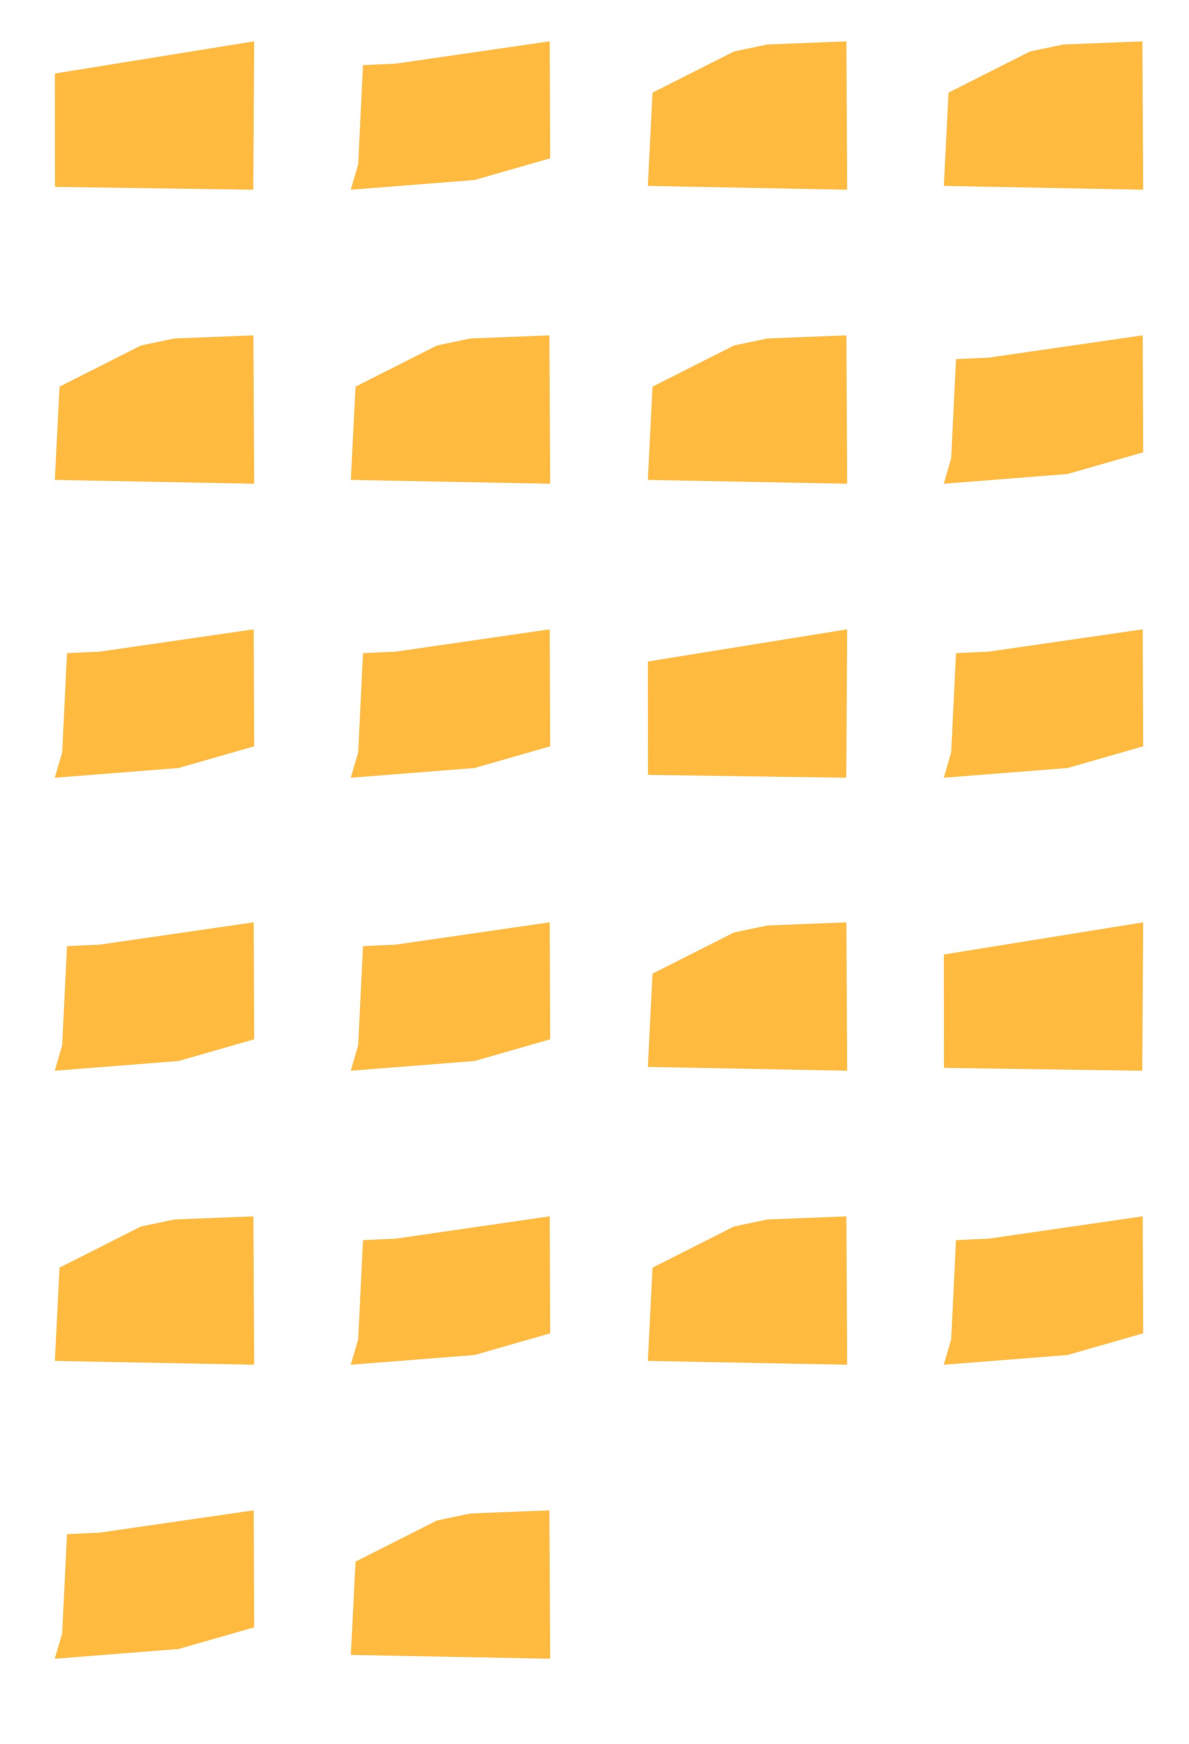

In [58]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Assuming you have defined your functions, including 'elementwise_division', and 'normalize_factor'

# New data point
input_data = np.array([60, 50, 1, 60000])  # Example new data point
new_data = elementwise_division(input_data, normalize_factor)

# Combine arrays into a single array
combined_array = np.column_stack((normalized_length, normalized_width, normalized_corners, normalized_area))

# Calculate Euclidean distances between new data and existing data
distances = np.sqrt(np.sum((combined_array - new_data) ** 2, axis=1))

# Find the index of the minimum distance
min_distance_index = np.argmin(distances)

# Minimum distance and corresponding data point
min_distance = distances[min_distance_index]
closest_data_point = combined_array[min_distance_index]

print("Minimum Distance:", min_distance)
print("Closest Data Point:", np.multiply(closest_data_point, normalize_factor))
print("Index of Minimum Distance Data Point:", min_distance_index)

# Define the tolerance range
tolerance = 0.2  # 20%

# Calculate the threshold distance
threshold_distance = min_distance * tolerance

# Find indices within the threshold range
indices_within_threshold = np.where(distances < (min_distance + threshold_distance))[0]

# Directory containing images
image_dir = r"D:\GNR_MP1\MP1\venv\ds203proj\loldataset"  # Double backslashes for Windows paths

# List to store images
images = []

# Iterate over indices within the threshold range
for index in indices_within_threshold:
    # Increment index by 1 to match the image file names
    index += 1
    
    # Image file name corresponding to the index
    image_file = os.path.join(image_dir, f'{index:04d}.jpg')  # Format the index with leading zeros
    
    # Check if the image file exists
    if os.path.exists(image_file):
        # Read the image
        image = cv2.imread(image_file)
        
        # Check if the image is loaded successfully
        if image is not None:
            # Append the image to the list
            images.append(image)
        else:
            print(f"Error: Failed to load the image '{image_file}'.")
    else:
        print(f"Error: Image file '{image_file}' not found.")

# Plot all images in a grid
num_images = len(images)
num_cols = 4  # Number of columns in the grid
num_rows = -(-num_images // num_cols)  # Ceiling division to calculate the number of rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))  # Adjust figsize as needed
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.axis('off')
    else:
        ax.axis('off')  # Hide empty subplots
plt.tight_layout()
plt.show()
